# BINARY SEARCH

### Find the Insertion Index

In [18]:
from typing import List


def find_the_insertion_index(nums: List[int], target: int) -> int:
    left, right = 0, len(nums)

    while left < right:
        mid = (left + right) // 2
        if nums[mid] >= target:
            right = mid
        else:
            left = mid + 1
    return left


nums = [1, 2, 4, 5, 7, 8, 9]
target = 4

find_the_insertion_index(nums, target)

2

### First and Last Occurrences of a Number


In [25]:
from typing import List


def first_and_last_occurences_of_a_number(nums, target):
    lower_bound = lower_bound_binary_search(nums, target)
    upper_bound = upper_bound_binary_search(nums, target)
    return [lower_bound, upper_bound]


def lower_bound_binary_search(nums, target):
    # define left, right
    left = 0
    right = len(nums) - 1
    # loop until left, right meets
    while left < right:
        # get mid value
        mid = (left + right) // 2  # 12 // 2 = 6
        # check w/ target value and update left, right pointers
        if nums[mid] > target:
            right = mid - 1
        elif nums[mid] < target:
            left = mid + 1
        else:
            right = mid
    # return the left index
    return left if nums and nums[left] == target else -1


def upper_bound_binary_search(nums, target):
    # define left, right
    left = 0
    right = len(nums) - 1
    # loop until left, right meets
    while left < right:
        mid = (left + right) // 2 + 1
        if nums[mid] > target:
            right = mid - 1
        elif nums[mid] < target:
            left = mid + 1
        else:
            left = mid

    # return the right index (upper bound index)
    return right if nums and nums[right] == target else -1


nums = [1, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10]
target = 10
# nums = [1, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11]
# target = 4

first_and_last_occurrences_of_a_number(nums, target)

[8, 10]

### Cutting Wood


In [16]:
from typing import List


def cutting_wood(heights: List[int], k: int) -> int:
    left, right = 0, max(heights)
    while left < right:
        mid = (left + right) // 2 + 1
        if cuts_enough_wood(H=mid, k=k, heights=heights):  # check if H=0 return True
            left = mid
        else:
            right = mid - 1
    return right


# Determine if the current value of 'H' cuts at least 'k' meters of
# wood.
def cuts_enough_wood(H: int, k: int, heights: List[int]) -> bool:
    wood_collected = 0
    for height in heights:
        if height > H:
            wood_collected += height - H
    return wood_collected >= k


heights = [2, 6, 3, 8]
k = 7

cutting_wood(heights, k)

3

### Find the Target in a Rotated Sorted Array


In [30]:
from typing import List


def find_the_target_in_a_rotated_sorted_array(nums: List[int], target: int) -> int:
    left = 0
    right = len(nums) - 1

    while left < right:
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid
        # search the left  space
        elif nums[left] <= nums[mid]:
            if nums[left] <= target < nums[mid]:
                right = mid - 1
            else:
                left = mid + 1

        # search the right space
        else:
            if nums[mid] < target <= nums[right]:
                left = mid + 1
            else:
                right = mid - 1

    return left if nums and nums[left] == target else -1


nums = []
target = 1

find_the_target_in_a_rotated_sorted_array(nums, target)

-1

### Find the Median From Two Sorted Arrays


In [8]:
from typing import List


def find_the_median_from_two_sorted_arrays(nums1: List[int], nums2: List[int]) -> float:
    if len(nums1) < len(nums2):
        nums1, nums2 = nums2, nums1

    # get midpoint
    m, n = len(nums1), len(nums2)
    half_total_len = (m + n) // 2
    left = 0
    right = m - 1

    # get the median using binary search
    while True:
        L1_index = (left + right) // 2
        L2_index = half_total_len - (L1_index + 1) - 1
        # get the L1, L2, R1, R2
        L1 = float("-inf") if L1_index < 0 else nums1[L1_index]
        L2 = float("-inf") if L2_index < 0 else nums2[L2_index]
        R1 = float("inf") if L1_index >= m - 1 else nums1[L1_index + 1]
        R2 = float("inf") if L2_index >= n - 1 else nums2[L2_index + 1]
        # print(L1, L2, R1, R2)
        # break

        if L1 > R2:
            right = L1_index - 1
        elif L2 > R1:
            left = L1_index + 1
        else:
            if (m + n) % 2 == 0:  # if even
                return (max(L1, L2) + min(R1, R2)) / 2.0
            else:  # if odd
                return min(R1, R2)


nums1 = [0, 2, 5, 6, 8]
nums2 = [1, 3, 7]

find_the_median_from_two_sorted_arrays(nums1, nums2)

4.0

### Matrix Search


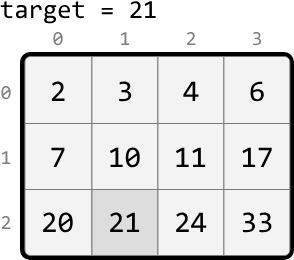

In [1]:
# Define the matrix
matrix = [[2, 3, 4, 6], [7, 10, 11, 17], [20, 21, 24, 33]]

# Print the matrix
for row in matrix:
    print(row)

[2, 3, 4, 6]
[7, 10, 11, 17]
[20, 21, 24, 33]


In [16]:
from typing import List


def matrix_search(matrix: List[List[int]], target: int) -> bool:
    # get the # of rows, cols
    m = len(matrix)
    n = len(matrix[0])  # [2, 3, 4, 6]

    # get left, right pointers
    left = 0
    right = (m * n) - 1  # lenght of flattened matrix

    # loop until left, right are <=
    while left <= right:
        # get mid point
        mid = (left + right) // 2

        # get the index of row, col at midpoint
        r = mid // n  # quotient
        c = mid % n  # remainder

        # check the value at midpoint to compare w/ target
        if matrix[r][c] == target:
            return True
        elif matrix[r][c] < target:
            left = mid + 1
        else:
            right = mid - 1
    return False


matrix_search(matrix, target=21)

True

3

### Local Maxima in Array


### Weighted Random Selection